In [3]:
from src import esma

In [7]:
def init_model():
    model = esma.project(project_id='Bi-1L')
    model.set_pseudo(path="/scratch/s.sevim/espresso-machine/Pseudopotentials/PBE/PAW")
    model.get_structure(format="poscar",path="/scratch/s.sevim/espresso-machine/Structures/Bi-1L.poscar")
    model.set_cores(64)
    model.ecutwfc(80) #Set wavefunction cutoff
    model.ecutrho(800) #Set wavefunction cutoff
    model.k_points([16,16,1]) #Set number of k points
    model.degauss(0.01) #Set degauss value
    model.conv_thr(1e-8) #Set convergence threshold
    model.smearing('fd')
    model.electron_maxstep(500) #Max number of electron iteration
    model.exchange_maxstep(500) #Max number of exchange iteration
    model.etot_conv_thr(10**-5)
    model.forc_conv_thr(10**-4)
    model.mixing_mode('local-TF')
    return model

In [8]:
model = init_model()

In [10]:
model.calculate('scf')

scf for results is started
scf for results is finished


bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


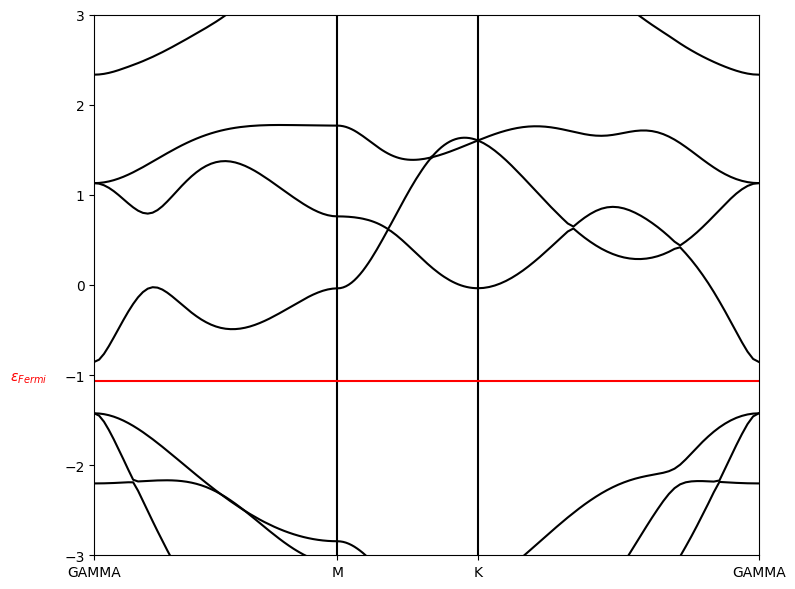

In [11]:
path = ['GAMMA','M',"K","GAMMA"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')
model.plot('electron',ylim=[-3,3],save=True) #plot electron bands